In [1]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score



In [2]:

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from keras.preprocessing import text, sequence

import nltk
import re
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
#there are 83 linguistic features

In [5]:
##TODO

csv_file = '/Users/swcam/Documents/GitHub/Sarcasm/Final_data/liwc_response_train.csv'
#csv_file = '/Users/swcam/Documents/GitHub/Sarcasm/Final_Features_train_data'
Train_df = pd.read_csv(csv_file)
Train_df = Train_df.loc[:, ~Train_df.columns.str.contains('^Unnamed')]
# print out the first few rows of data info
Train_df.head(5)

#These are the most useful features per SHAP 




,verb,funct,auxverb,present,pronoun,ipron,cogmech,certain,ppron,you,social,affect,posemo,conj,tentat,excl,future,discrep,past,motion,relativ,space,preps,incl,adverb,insight,shehe,achieve,negemo,anger,they,cause,article,money,work,percept,hear,swear,time,negate,leisure,death,number,see,sad,quant,anx,assent,bio,health,filler,body,friend,sexual,we,home,feel,inhib,humans,i,family,relig,nonfl,ingest,label,noun_count_percent,adj_count_percent,adv_count_percent,pro_count_percent,char_count,word_density,punctuation_count,upper_case_word_count,vader_pos,vader_neg,vader_neu,vader_compound,response,Response_emotion,valence_response,arousal_response,dominance_response,tokenized_text
0,7,13,3,5,5,1,6,1,4,3,4,2,2,2,1,1,1,1,1,1,2,1,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,0.310345,0.034483,0.172414,0.172414,4.862069,0.167658,0.379310,0.137931,0.204,0.000,0.796,0.87530,I don't get this .. obviously you do car...,sadness,6.222500,3.695000,5.965000,"['I', 'do', ""n't"", 'get', 'this', '..', 'obvio..."
1,2,11,1,2,5,1,3,0,4,0,4,1,0,2,0,0,0,0,0,0,0,0,3,2,2,0,2,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,0.250000,0.000000,0.000000,0.166667,5.000000,0.208333,0.166667,0.125000,0.000,0.256,0.744,0.11985,trying to protest about . Talking about hi...,anger,5.190000,3.713333,5.733333,"['trying', 'to', 'protest', 'about', '.', 'Tal..."
2,1,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,0.055556,0.000000,0.000000,0.055556,5.777778,0.320988,0.333333,0.222222,0.000,0.176,0.824,0.27130,He makes an insane about of money from t...,anger,5.246667,5.223333,5.426667,"['He', 'makes', 'an', 'insane', 'about', 'of',..."
3,3,9,1,0,4,0,2,1,4,0,5,1,0,1,0,0,0,0,3,0,1,0,0,1,2,0,3,0,1,1,1,0,1,0,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,0.208333,0.041667,0.166667,0.166667,5.833333,0.243056,0.166667,0.125000,0.000,0.130,0.870,0.24470,Meanwhile Trump won't even release his SAT...,anger,5.661111,4.428889,5.907778,"['Meanwhile', 'Trump', 'wo', ""n't"", 'even', 'r..."
4,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,0.060606,0.030303,0.030303,0.030303,5.575758,0.168962,0.393939,0.090909,0.193,0.000,0.807,0.83525,Pretty Sure the Anti-Lincoln Crowd Claimed...,joy,5.000000,5.000000,5.000000,"['Pretty', 'Sure', 'the', 'Anti-Lincoln', 'Cro..."


In [6]:
##TODO

csv_file = '/Users/swcam/Documents/GitHub/Sarcasm/Final_data/liwc_response_test.csv'
#csv_file = '/Users/swcam/Documents/GitHub/Sarcasm/Final_Features_test_data'
Test_df = pd.read_csv(csv_file)
Test_df = Test_df.loc[:, ~Test_df.columns.str.contains('^Unnamed')]
# print out the first few rows of data info
Test_df.head(5)



,time,relativ,funct,pronoun,ipron,adverb,cogmech,excl,leisure,conj,incl,verb,past,social,ppron,i,cause,humans,certain,achieve,preps,tentat,space,affect,filler,posemo,present,they,shehe,negemo,anger,quant,auxverb,article,insight,work,you,motion,discrep,assent,inhib,home,percept,hear,anx,sad,see,money,negate,bio,health,sexual,nonfl,future,swear,ingest,feel,number,body,relig,family,we,death,friend,label,noun_count_percent,adj_count_percent,adv_count_percent,pro_count_percent,char_count,word_density,punctuation_count,upper_case_word_count,vader_pos,vader_neg,vader_neu,vader_compound,response,Response_emotion,valence_response,arousal_response,dominance_response,tokenized_text
0,6.0,6.0,19.0,9.0,5.0,3.0,9.0,2.0,2.0,5.0,2.0,2.0,1.0,7.0,4.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,1.0,4.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_SARCASM,0.134328,0.104478,0.089552,0.074627,4.567164,0.068167,0.283582,0.074627,0.147,0.134,0.719,0.71005,"My 3 year old , that just finished readi...",joy,5.671111,4.181667,5.976667,"['My', '3', 'year', 'old', ',', 'that', 'just'..."
1,1.0,1.0,6.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SARCASM,0.181818,0.136364,0.045455,0.090909,4.818182,0.219008,0.363636,0.090909,0.215,0.131,0.654,0.60115,How many verifiable lies has he told now ?...,joy,5.442857,3.635714,5.554286,"['How', 'many', 'verifiable', 'lies', 'has', '..."
2,0.0,0.0,7.0,1.0,1.0,1.0,4.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SARCASM,0.130435,0.043478,0.043478,0.043478,4.695652,0.204159,0.260870,0.173913,0.000,0.000,1.000,0.50000,Maybe Docs just a scrub of a coach ... I...,anger,5.236250,4.210000,5.270000,"['Maybe', 'Docs', 'just', 'a', 'scrub', 'of', ..."
3,0.0,4.0,9.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_SARCASM,0.045455,0.090909,0.045455,0.000000,4.272727,0.194215,0.318182,0.181818,0.000,0.200,0.800,0.19430,is just a cover up for the real hate insid...,anger,5.174000,4.290000,5.474000,"['is', 'just', 'a', 'cover', 'up', 'for', 'the..."
4,0.0,0.0,6.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_SARCASM,0.200000,0.000000,0.133333,0.066667,4.200000,0.280000,0.266667,0.200000,0.000,0.091,0.909,0.47420,The irony being that he even has to ask ...,anger,5.795000,3.630000,5.697500,"['The', 'irony', 'being', 'that', 'he', 'even'..."


In [7]:
Test_df.shape

(1800, 83)

In [8]:
X_train = Train_df

X_test= Test_df

y_train= Train_df['label']

y_test = Test_df['label']

In [9]:

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

# Count Vectors

In [10]:

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}') # word that appears 1 or more times
count_vect.fit(Train_df['response'])
count_vect.fit(Test_df['response'])
# to show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
count_vect.vocabulary_

# transform the training and validation data using count vectorizer object: doc x term
xtrain_count =  count_vect.transform(Train_df['response']) 
xvalid_count =  count_vect.transform(Test_df['response'])

xvalid_count= xvalid_count.toarray()
xtrain_count= xtrain_count.toarray()

# Word level tfidf Vectors

In [11]:

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000) # considers the top 5000 most frequent features
tfidf_vect.fit(Train_df['response'])
tfidf_vect.fit(Test_df['response'])


tfidf_train = tfidf_vect.transform(Train_df['response'])
tfidf_test = tfidf_vect.transform(Test_df['response'])

tfidf_train = tfidf_train.toarray()
tfidf_test = tfidf_test.toarray()




# ngram level tf-idf

In [12]:
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(Train_df['response'])
tfidf_vect_ngram.fit(Test_df['response'])

tfidf_ngram_train =  tfidf_vect_ngram.transform(Train_df['response'])
tfidf_ngram_test =  tfidf_vect_ngram.transform(Test_df['response'])

tfidf_ngram_train = tfidf_ngram_train.toarray()
tfidf_ngram_test = tfidf_ngram_test.toarray()

# Character level tf-idf

In [13]:
  ### characters level tf-idf

tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(Train_df['response'])
tfidf_vect_ngram_chars.fit(Test_df['response'])


tfidf_ngram_chars_train =  tfidf_vect_ngram_chars.transform(Train_df['response']) 

tfidf_ngram_chars_test =  tfidf_vect_ngram_chars.transform(Test_df['response'])
                                   

                                   
tfidf_ngram_chars_train =  tfidf_ngram_chars_train.toarray()

tfidf_ngram_chars_test = tfidf_ngram_chars_test.toarray()
                                           
                                   
                                   

C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
# fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

# predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return metrics.accuracy_score(predictions, y_test),metrics.precision_score(predictions, y_test),metrics.recall_score(predictions, y_test),metrics.f1_score(predictions, y_test)


# Results on Test data running only count vectors 

# Naive Bayes


In [44]:
from sklearn.naive_bayes import GaussianNB

accuracy, precision, recall,f1  = train_model(naive_bayes.GaussianNB(), tfidf_ngram_train , y_train, tfidf_ngram_test)
print ("  word level tfidf feature NB, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(naive_bayes.GaussianNB(), xtrain_count , y_train, xvalid_count)
print (" Count vector feature NB, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(naive_bayes.GaussianNB(), tfidf_ngram_train , y_train, tfidf_ngram_test)
print (" ngram word level tfidf feature NB, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(naive_bayes.GaussianNB(), tfidf_ngram_chars_train , y_train, tfidf_ngram_chars_test)
print (" ngram char level tfidf feature NB, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

  word level tfidf feature NB, :  A: 0.58 P: 0.67 R: 0.56 F1: 0.61
 Count vector feature NB, :  A: 0.59 P: 0.64 R: 0.58 F1: 0.61
 ngram word level tfidf feature NB, :  A: 0.58 P: 0.67 R: 0.56 F1: 0.61
 ngram char level tfidf feature NB, :  A: 0.6 P: 0.78 R: 0.57 F1: 0.66


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

accuracy, precision, recall,f1  = train_model(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0), tfidf_ngram_train , y_train, tfidf_ngram_test)
print ("word level tfidf feature RF : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0), xtrain_count , y_train, xvalid_count)
print ("Count vector feature RF, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0), tfidf_ngram_train , y_train, tfidf_ngram_test)
print ("ngram word level tfidf feature RF, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0), tfidf_ngram_chars_train , y_train, tfidf_ngram_chars_test)
print ("ngram char level tfidf feature RF, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

word level tfidf feature RF :  A: 0.58 P: 0.82 R: 0.55 F1: 0.66
Count vector feature RF, :  A: 0.62 P: 0.71 R: 0.6 F1: 0.65
ngram word level tfidf feature RF, :  A: 0.58 P: 0.82 R: 0.55 F1: 0.66
ngram char level tfidf feature RF, :  A: 0.64 P: 0.74 R: 0.61 F1: 0.67


# SVM

In [47]:
from sklearn.svm import SVC


accuracy, precision, recall,f1  = train_model(svm.SVC(), tfidf_ngram_train , y_train, tfidf_ngram_test)
print ("word level tfidf feature SVM : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(svm.SVC(), xtrain_count , y_train, xvalid_count)
print ("Count vector feature SVM, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(svm.SVC(), tfidf_ngram_train , y_train, tfidf_ngram_test)
print ("ngram word level tfidf feature SVM, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(svm.SVC(), tfidf_ngram_chars_train , y_train, tfidf_ngram_chars_test)
print ("ngram char level tfidf feature SVM, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

Svm:  A: 0.65 P: 0.66 R: 0.65 F1: 0.66
word level tfidf feature RF :  A: 0.62 P: 0.75 R: 0.6 F1: 0.67
Count vector feature RF, :  A: 0.65 P: 0.66 R: 0.65 F1: 0.66
ngram word level tfidf feature RF, :  A: 0.62 P: 0.75 R: 0.6 F1: 0.67
ngram char level tfidf feature RF, :  A: 0.69 P: 0.77 R: 0.66 F1: 0.71


# Combining Features

In [15]:
all_count_features_train = np.column_stack([xtrain_count,tfidf_ngram_train,tfidf_ngram_train,tfidf_ngram_chars_train])

In [16]:
all_count_features_test = np.column_stack([tfidf_ngram_test,xvalid_count,tfidf_ngram_test,tfidf_ngram_chars_test])

# Testing only count vector combination 

In [53]:
accuracy, precision, recall,f1  = train_model(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0), all_count_features_train, y_train, all_count_features_test)
print ("all count features combo RF : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(naive_bayes.GaussianNB(), all_count_features_train , y_train, all_count_features_test)
print (" all count features combo NB, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(svm.SVC(), all_count_features_train , y_train, all_count_features_test)
print ("all count features combo SVM : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))



all count features combo RF :  A: 0.63 P: 0.72 R: 0.61 F1: 0.66
 ngram char level tfidf feature NB, :  A: 0.51 P: 0.65 R: 0.51 F1: 0.57
all count features combo SVM :  A: 0.55 P: 0.58 R: 0.55 F1: 0.57


# Combining Linguistic Features to Count Vectors

In [19]:
X_test = X_test.drop(['tokenized_text','label','response'], axis=1)
X_train = X_train.drop(['tokenized_text','label','response'], axis=1)

In [21]:
X_test['Response_emotion'] = X_test['Response_emotion'].astype('category').cat.codes
X_train['Response_emotion'] = X_train['Response_emotion'].astype('category').cat.codes

# ALL Linguistic Features + ALL count features

In [22]:
all_features_train = np.column_stack([all_count_features_train, X_train])
all_features_test = np.column_stack([all_count_features_test, X_test])

In [85]:
accuracy, precision, recall,f1  = train_model(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0), all_features_train, y_train, all_features_test)
print ("Linguistic + count features RF : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(naive_bayes.GaussianNB(), all_features_train , y_train, all_features_test)
print ("Linguistic + count features NB, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))



Linguistic + count features RF :  A: 0.65 P: 0.7 R: 0.64 F1: 0.67
Linguistic + count features NB, :  A: 0.6 P: 0.7 R: 0.59 F1: 0.64


In [103]:
accuracy, precision, recall,f1  = train_model(svm.SVC(), all_features_train , y_train, all_features_test)
print ("Linguistic + count features SVM : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))



Linguistic + count features SVM :  A: 0.57 P: 0.57 R: 0.57 F1: 0.57


# All Linguistic Features + Ngram Character tfidf

In [23]:
all_ling_ngram_chars_train = np.column_stack([tfidf_ngram_chars_train, X_train])
all_ling_ngram_chars_test = np.column_stack([tfidf_ngram_chars_test, X_test])

In [84]:
accuracy, precision, recall,f1  = train_model(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0), all_ling_ngram_chars_train, y_train, all_ling_ngram_chars_test)
print ("all Linguistic Features + Ngram Char level tfidfRF : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(naive_bayes.GaussianNB(), all_ling_ngram_chars_train , y_train, all_ling_ngram_chars_test)
print ("all Linguistic Features + Ngram Char level tfidf NB, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))



Linguistic + count features RF :  A: 0.65 P: 0.7 R: 0.64 F1: 0.67
Linguistic + count features NB, :  A: 0.6 P: 0.7 R: 0.59 F1: 0.64


In [104]:
accuracy, precision, recall,f1  = train_model(svm.SVC(), all_ling_ngram_chars_train , y_train, all_ling_ngram_chars_test)
print ("all Linguistic Features + Ngram Char level tfidf SVM : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))



all Linguistic Features + Ngram Char level tfidf SVM :  A: 0.57 P: 0.57 R: 0.57 F1: 0.57


In [18]:
Train_df.head()

,verb,funct,auxverb,present,pronoun,ipron,cogmech,certain,ppron,you,social,affect,posemo,conj,tentat,excl,future,discrep,past,motion,relativ,space,preps,incl,adverb,insight,shehe,achieve,negemo,anger,they,cause,article,money,work,percept,hear,swear,time,negate,leisure,death,number,see,sad,quant,anx,assent,bio,health,filler,body,friend,sexual,we,home,feel,inhib,humans,i,family,relig,nonfl,ingest,label,noun_count_percent,adj_count_percent,adv_count_percent,pro_count_percent,char_count,word_density,punctuation_count,upper_case_word_count,vader_pos,vader_neg,vader_neu,vader_compound,response,Response_emotion,valence_response,arousal_response,dominance_response,tokenized_text
0,7,13,3,5,5,1,6,1,4,3,4,2,2,2,1,1,1,1,1,1,2,1,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,0.310345,0.034483,0.172414,0.172414,4.862069,0.167658,0.379310,0.137931,0.204,0.000,0.796,0.87530,I don't get this .. obviously you do car...,sadness,6.222500,3.695000,5.965000,"['I', 'do', ""n't"", 'get', 'this', '..', 'obvio..."
1,2,11,1,2,5,1,3,0,4,0,4,1,0,2,0,0,0,0,0,0,0,0,3,2,2,0,2,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,0.250000,0.000000,0.000000,0.166667,5.000000,0.208333,0.166667,0.125000,0.000,0.256,0.744,0.11985,trying to protest about . Talking about hi...,anger,5.190000,3.713333,5.733333,"['trying', 'to', 'protest', 'about', '.', 'Tal..."
2,1,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,0.055556,0.000000,0.000000,0.055556,5.777778,0.320988,0.333333,0.222222,0.000,0.176,0.824,0.27130,He makes an insane about of money from t...,anger,5.246667,5.223333,5.426667,"['He', 'makes', 'an', 'insane', 'about', 'of',..."
3,3,9,1,0,4,0,2,1,4,0,5,1,0,1,0,0,0,0,3,0,1,0,0,1,2,0,3,0,1,1,1,0,1,0,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,0.208333,0.041667,0.166667,0.166667,5.833333,0.243056,0.166667,0.125000,0.000,0.130,0.870,0.24470,Meanwhile Trump won't even release his SAT...,anger,5.661111,4.428889,5.907778,"['Meanwhile', 'Trump', 'wo', ""n't"", 'even', 'r..."
4,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,0.060606,0.030303,0.030303,0.030303,5.575758,0.168962,0.393939,0.090909,0.193,0.000,0.807,0.83525,Pretty Sure the Anti-Lincoln Crowd Claimed...,joy,5.000000,5.000000,5.000000,"['Pretty', 'Sure', 'the', 'Anti-Lincoln', 'Cro..."


# Select Linguistic Features

In [27]:
#SHAP

#Train_df_select = Train_df[['vader_compound', 'valence_response', 'time','word_density','noun_count_percent','dominance_response','you','upper_case_word_count','adj_count_percent','char_count','vader_neu','arousal_response','funct','pro_count_percent','Response_emotion','ppron','relativ','adv_count_percent']]
#Test_df_select = Test_df[['vader_compound', 'valence_response', 'time','word_density','noun_count_percent','dominance_response','you','upper_case_word_count','adj_count_percent','char_count','vader_neu','arousal_response','funct','pro_count_percent','Response_emotion','ppron','relativ','adv_count_percent']]

#Turf
#Train_df_select= Train_df[['Response_emotion','word_density','valence_response','vader_neg','vader_neu','noun_count_percent','affect','funct','negemo','vader_pos','adv_count_percent','relativ','vader_compound','char_count','posemo','dominance_response','pro_count_percent','leisure','anger','cause']].copy()
#Test_df_select= Test_df[['Response_emotion','word_density','valence_response','vader_neg','vader_neu','noun_count_percent','affect','funct','negemo','vader_pos','adv_count_percent','relativ','vader_compound','char_count','posemo','dominance_response','pro_count_percent','leisure','anger','cause']].copy()

#Relief
Train_df_select = Train_df[['Response_emotion','valence_response','vader_neg','word_density','vader_compound','vader_neu','noun_count_percent','negemo','vader_pos','affect','dominance_response','char_count','leisure','funct','posemo','negate','ppron','anger','relativ','money']].copy()

Test_df_select = Test_df[['Response_emotion','valence_response','vader_neg','word_density','vader_compound','vader_neu','noun_count_percent','negemo','vader_pos','affect','dominance_response','char_count','leisure','funct','posemo','negate','ppron','anger','relativ','money']].copy()


In [28]:
Train_df_select ['Response_emotion'] = Train_df_select ['Response_emotion'].astype('category').cat.codes
Test_df_select['Response_emotion'] = Test_df_select['Response_emotion'].astype('category').cat.codes

In [29]:
accuracy, precision, recall,f1  = train_model(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0), Train_df_select, y_train, Test_df_select)
print ("Select Linguistic Features RF : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(naive_bayes.GaussianNB(), Train_df_select, y_train, Test_df_select)
print ("Select Linguistic Features NB, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))


Select Linguistic Features RF :  A: 0.59 P: 0.55 R: 0.6 F1: 0.57
Select Linguistic Features NB, :  A: 0.59 P: 0.61 R: 0.59 F1: 0.6


In [95]:
accuracy, precision, recall,f1  = train_model(svm.SVC(), Train_df_select, y_train, Test_df_select)
print ("Select Linguistic Features SVM : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))



Select Linguistic Features SVM :  A: 0.58 P: 0.42 R: 0.62 F1: 0.5


# Select Linguistic Features + All counts

In [30]:
select_ling_all_count_train = np.column_stack([all_count_features_train, Train_df_select])
select_ling_all_count_test = np.column_stack([all_count_features_test, Test_df_select])

In [31]:
accuracy, precision, recall,f1  = train_model(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0), select_ling_all_count_train, y_train, select_ling_all_count_test)
print ("Select Linguistic + ALL counts RF : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(naive_bayes.GaussianNB(), select_ling_all_count_train, y_train, select_ling_all_count_test)
print ("Select Linguistic + ALL counts NB, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))


Select Linguistic + ALL counts RF :  A: 0.65 P: 0.73 R: 0.63 F1: 0.68
Select Linguistic + ALL counts NB, :  A: 0.51 P: 0.65 R: 0.51 F1: 0.57


In [105]:
accuracy, precision, recall,f1  = train_model(svm.SVC(), select_ling_all_count_train, y_train, select_ling_all_count_test)
print ("Select Linguistic + ALL counts SVM : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))



Select Linguistic + ALL counts SVM :  A: 0.59 P: 0.76 R: 0.57 F1: 0.65


# Select Linguistic Features + ngram char tfidf

In [32]:
select_ling_ngram_char_train = np.column_stack([tfidf_ngram_chars_train, Train_df_select])
select_ling_ngram_char_test = np.column_stack([tfidf_ngram_chars_test, Test_df_select])

In [33]:
accuracy, precision, recall,f1  = train_model(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0), select_ling_ngram_char_train, y_train, select_ling_ngram_char_test)
print ("Select Linguistic + tfidf ngram char RF : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

accuracy, precision, recall,f1  = train_model(naive_bayes.GaussianNB(), select_ling_ngram_char_train, y_train, select_ling_ngram_char_test)
print ("Select Linguistic + tfidf ngram char NB, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))


Select Linguistic + tfidf ngram char RF :  A: 0.64 P: 0.68 R: 0.63 F1: 0.65
Select Linguistic + tfidf ngram char NB, :  A: 0.6 P: 0.7 R: 0.58 F1: 0.64


In [106]:
accuracy, precision, recall,f1  = train_model(svm.SVC(), select_ling_ngram_char_train, y_train, select_ling_ngram_char_test)
print ("Select Linguistic + tfidf ngram char SVM, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))


Select Linguistic + tfidf ngram char SVM, :  A: 0.59 P: 0.43 R: 0.63 F1: 0.51


# Cross Validation

C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

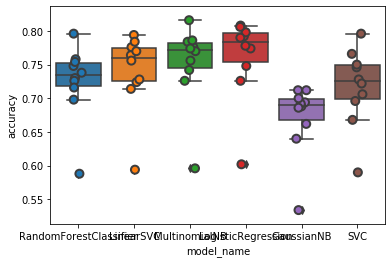

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0,max_iter=500),
    GaussianNB(),
    svm.SVC(),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, select_ling_all_count_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [37]:
cv_df.groupby('model_name').accuracy.mean()

model_name
GaussianNB                0.6720
LinearSVC                 0.7404
LogisticRegression        0.7622
MultinomialNB             0.7526
RandomForestClassifier    0.7252
SVC                       0.7168
Name: accuracy, dtype: float64

In [38]:
cv_df.groupby('model_name').accuracy.max()

model_name
GaussianNB                0.712
LinearSVC                 0.794
LogisticRegression        0.808
MultinomialNB             0.816
RandomForestClassifier    0.796
SVC                       0.796
Name: accuracy, dtype: float64

In [35]:
cv_df.groupby('model_name').accuracy.min()

model_name
GaussianNB                0.524
LinearSVC                 0.590
LogisticRegression        0.582
MultinomialNB             0.578
RandomForestClassifier    0.566
SVC                       0.580
Name: accuracy, dtype: float64